In [93]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras

In [94]:
model_comparative = pd.DataFrame(columns=['RMSE'])





def AddModel(metric, value, model_comparative):
    # Crear un DataFrame con la métrica y el valor directamente
    met = pd.DataFrame({'RMSE': [np.round(value, 3)]}, index=[metric])

    # Concatenar el nuevo modelo al DataFrame existente
    model_comparative = pd.concat([model_comparative, met])

    # Ordenar el DataFrame por la columna 'RMSE' en orden ascendente
    model_comparative = model_comparative.sort_values(by=['RMSE'], ascending=True)

    return model_comparative

In [95]:

# Load the CSV file into a pandas DataFrame
world_cups = pd.read_csv('WorldCupMatches.csv', sep=',')

world_cups

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
world_cups = world_cups.dropna()
world_cups

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [97]:
world_cups['Attendance'] = pd.to_numeric(world_cups['Attendance'], errors='coerce')

In [98]:
world_cups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           850 no

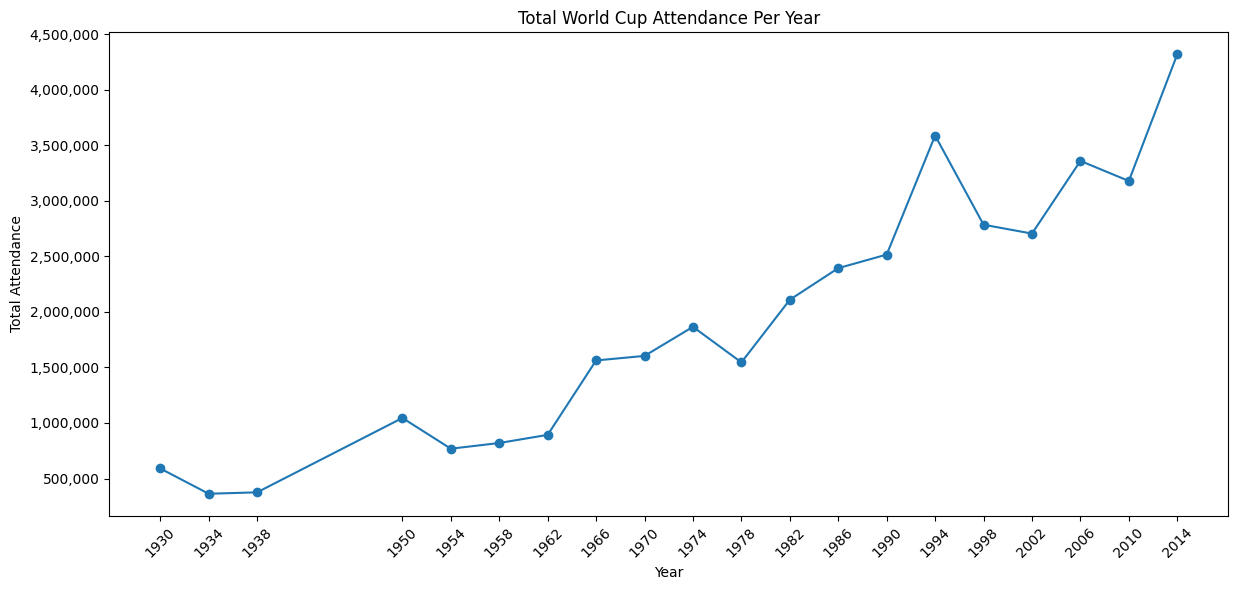

In [99]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Group by 'Year' and sum 'Attendance'
attendance_per_year = world_cups.groupby('Year')['Attendance'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(attendance_per_year['Year'], attendance_per_year['Attendance'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.title('Total World Cup Attendance Per Year')
plt.xticks(rotation=45)
# Set x-axis ticks to show all years
plt.xticks(attendance_per_year['Year'])
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

In [100]:
dt = world_cups.groupby('Year')['Attendance'].sum().reset_index()
dt

,Year,Attendance
0,1930.0,590549.0
1,1934.0,363000.0
2,1938.0,375700.0
3,1950.0,1045246.0
4,1954.0,768607.0
5,1958.0,819810.0
6,1962.0,893172.0
7,1966.0,1563135.0
8,1970.0,1603975.0
9,1974.0,1865753.0


In [101]:
ts = pd.DataFrame(dt['Attendance'])
ts.index = dt['Year']

ts.head()

,Attendance
Year,
1930.0,590549.0
1934.0,363000.0
1938.0,375700.0
1950.0,1045246.0
1954.0,768607.0


Text(0, 0.5, 'attendance')

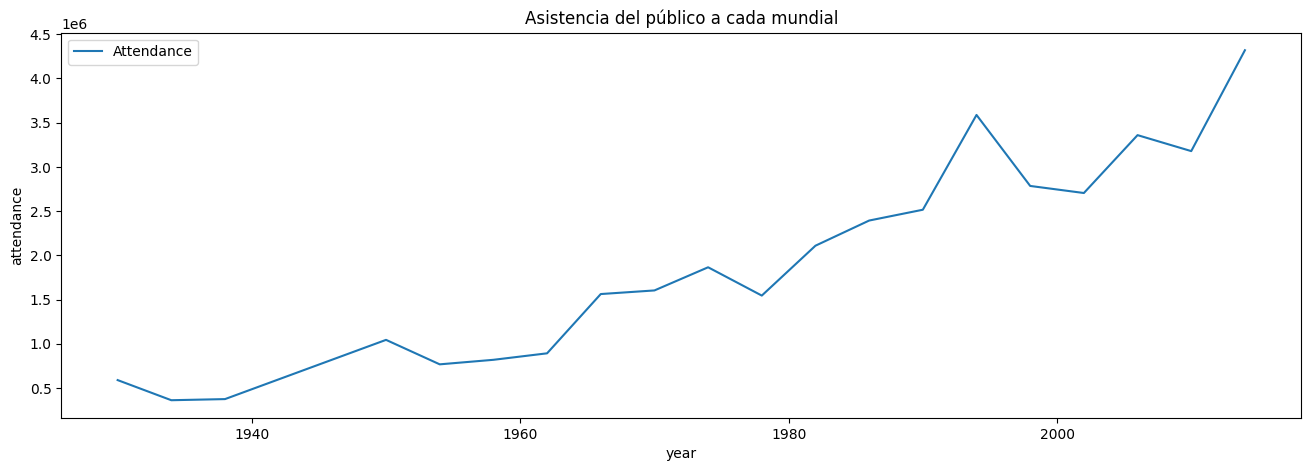

In [102]:
ax = ts.plot(figsize=(16,5), title='Asistencia del público a cada mundial')
ax.set_xlabel("year")
ax.set_ylabel("attendance")

#### Componentes de TS

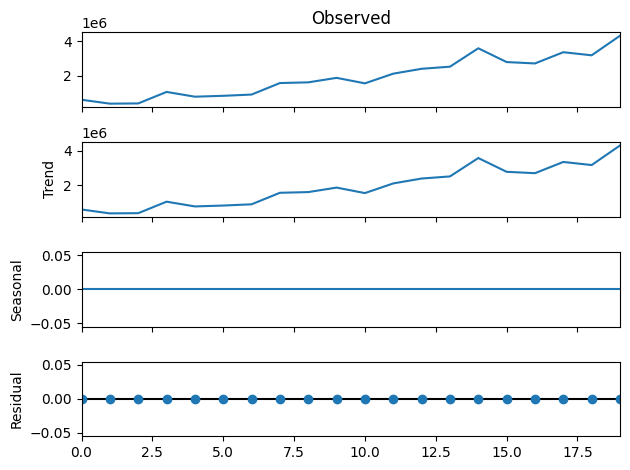

In [103]:
result = seasonal_decompose(ts.values, model='additive', period=1)
result.plot();

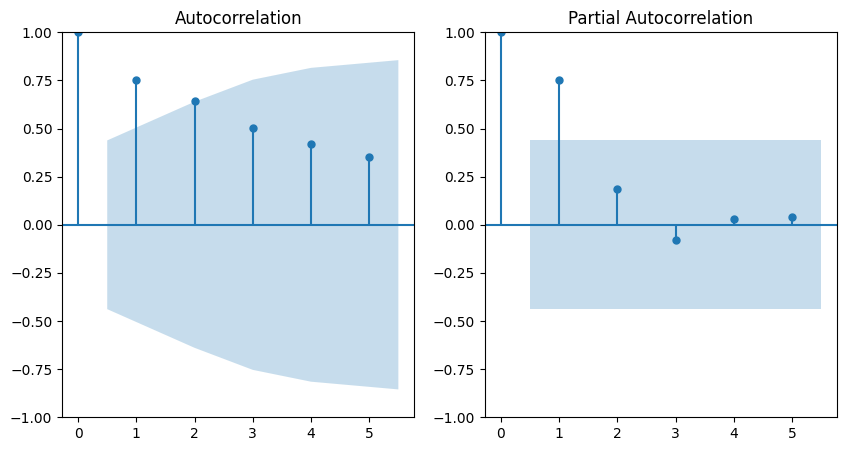

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_acf(ts, lags=5, ax=ax[0])  # Reduced lags for ACF as well for consistency
plot_pacf(ts, lags=5, ax=ax[1])  # Reduced lags for PACF
plt.show()

#### Estacionariedad

In [105]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ts)
print("The p-value: ", adf_test[1])

The p-value:  0.9871947621385044


### Data processing

#### Provocar estacionariedad

Text(0, 0.5, 'Attendance')

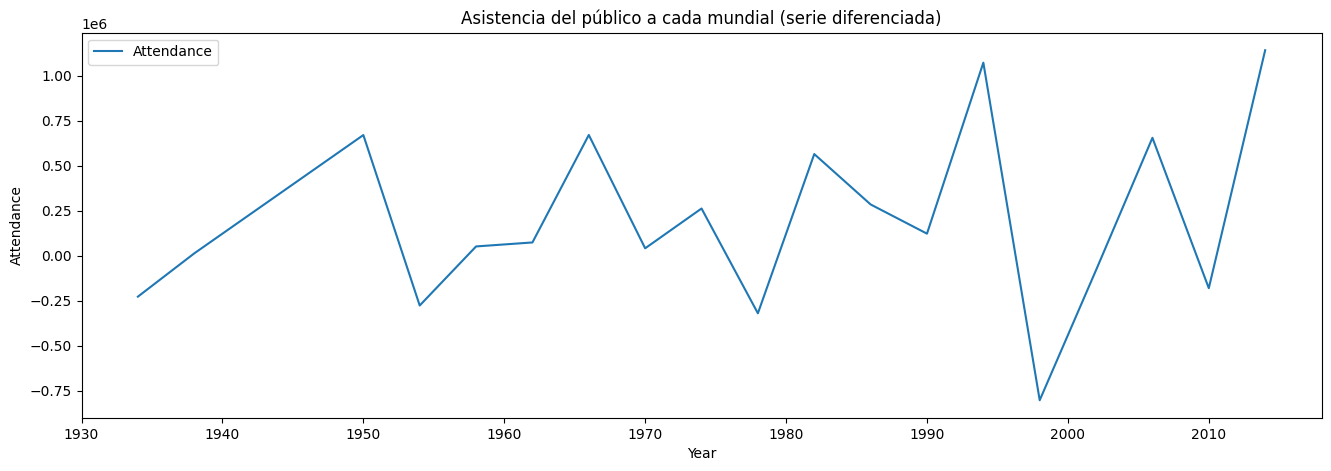

In [106]:
ts_bef =  ts.shift(periods=1)
ts_diff = ts - ts_bef
ts_diff = ts_diff.dropna()

ax = ts_diff.plot(figsize=(16,5), title='Asistencia del público a cada mundial (serie diferenciada)')
ax.set_xlabel("Year")
ax.set_ylabel("Attendance")

In [107]:
adf_test = adfuller(ts_diff)
print("The p-value: ", adf_test[1])

The p-value:  0.030360119539435054


#### Rolling window

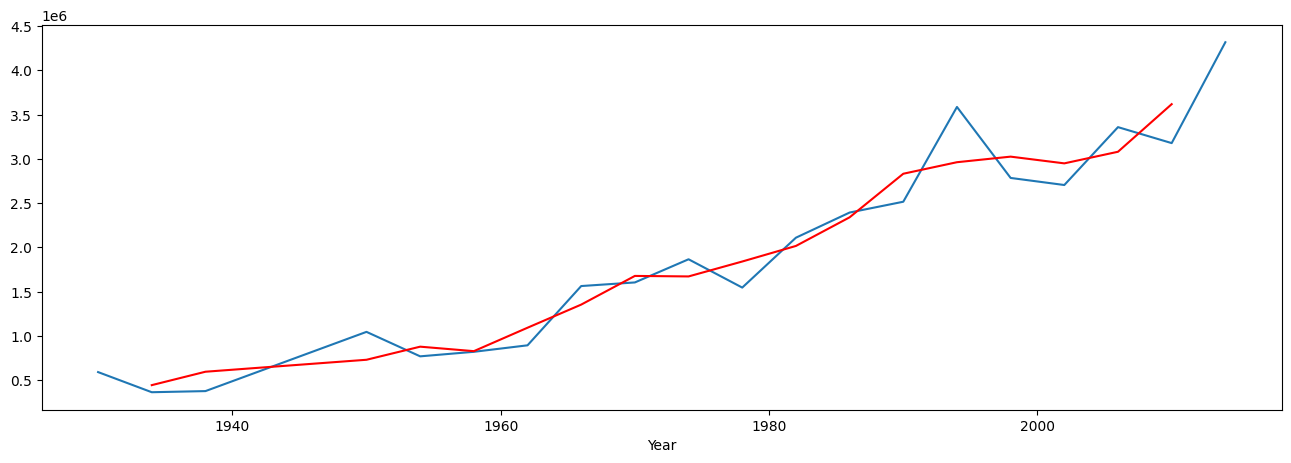

In [108]:
r = ts.rolling(window = 3, center=True)

figure(figsize=(16, 5))
ts['Attendance'].plot()
r.mean()['Attendance'].plot(color = 'red');

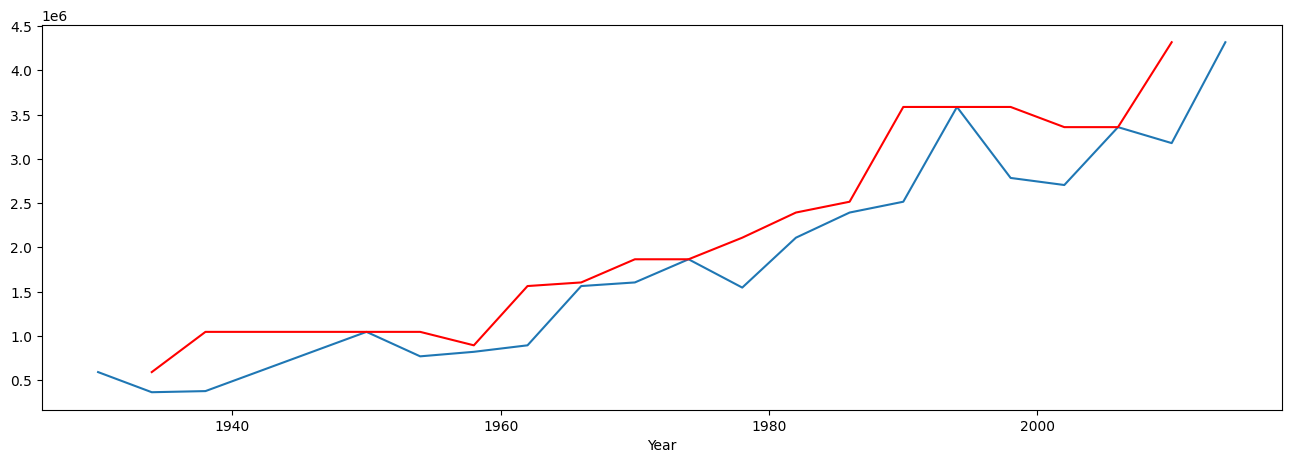

In [109]:
r = ts.rolling(window = 3, center=True)

figure(figsize=(16, 5))
ts['Attendance'].plot()
r.max()['Attendance'].plot(color = 'red');

### Features & Labels

Cuando entrenamos una serie temporal debemos saber bien cual es el label que queremos predecir. Es un caso concreto, ya que al ser dependiente de la variable tiempo si queremos predecir el valor en un instante t, entonces debemos trabajar con los valores inmediatamente previos.

Es decir, debemos elegir una serie de valores cuya label es el valor justo posterior, ya que hay una dependencia continua.

In [110]:
def prep_ts(dt, window_size, shuffle=True):
    tf_ts = tf.data.Dataset.from_tensor_slices(dt['Attendance'].values)

    tf_ts = tf_ts.window(5, shift=1, drop_remainder=True)
    tf_ts = tf_ts.flat_map(lambda window: window.batch(window_size))
    tf_ts = tf_ts.map(lambda window: (window[:-1], window[-1:]))
    if shuffle:
        tf_ts = tf_ts.shuffle(buffer_size=10)

    features, labels = [], []
    for x,y in tf_ts:

        features.append(x)
        labels.append(y)

    return np.array(features), np.array(labels)

Para que los algoritmos funcionen mejor, escalar es una buena primera opción a probar.

Como en este caso la variable a predecir es la misma que la variable a entrenar, ya que es una serie temporal, entonces tendremos que obtener el valor inicial más adelante para mostrar los resultados reales.

In [111]:
ts

,Attendance
Year,
1930.0,590549.0
1934.0,363000.0
1938.0,375700.0
1950.0,1045246.0
1954.0,768607.0
1958.0,819810.0
1962.0,893172.0
1966.0,1563135.0
1970.0,1603975.0


In [112]:
scaler = StandardScaler()
ts[['Attendance']] = scaler.fit_transform(ts[['Attendance']])
ts

,Attendance
Year,
1930.0,-1.177467
1934.0,-1.379077
1938.0,-1.367825
1950.0,-0.774601
1954.0,-1.019706
1958.0,-0.974339
1962.0,-0.909340
1966.0,-0.315746
1970.0,-0.279562


In [113]:
ts_reset = ts.reset_index()
train_size = int(len(ts_reset) * 0.7)
train_set = ts_reset[0:train_size]
test_set = ts_reset[train_size:]

print("train_set after resetting index:")
print(train_set)
print("\ntest_set after resetting index:")
print(test_set)

train_set after resetting index:
      Year  Attendance
0   1930.0   -1.177467
1   1934.0   -1.379077
2   1938.0   -1.367825
3   1950.0   -0.774601
4   1954.0   -1.019706
5   1958.0   -0.974339
6   1962.0   -0.909340
7   1966.0   -0.315746
8   1970.0   -0.279562
9   1974.0   -0.047624
10  1978.0   -0.331113
11  1982.0    0.168536
12  1986.0    0.420435
13  1990.0    0.528692

test_set after resetting index:
      Year  Attendance
14  1994.0    1.477894
15  1998.0    0.766926
16  2002.0    0.696131
17  2006.0    1.275796
18  2010.0    1.115798
19  2014.0    2.126191


## ARIMA

#### modelo estadístico utilizado para analizar y predecir datos de series temporales

RMSE del modelo ARIMA en el conjunto de prueba (escala original): 466803.476
MAE del modelo ARIMA en el conjunto de prueba (escala original): 352458.713


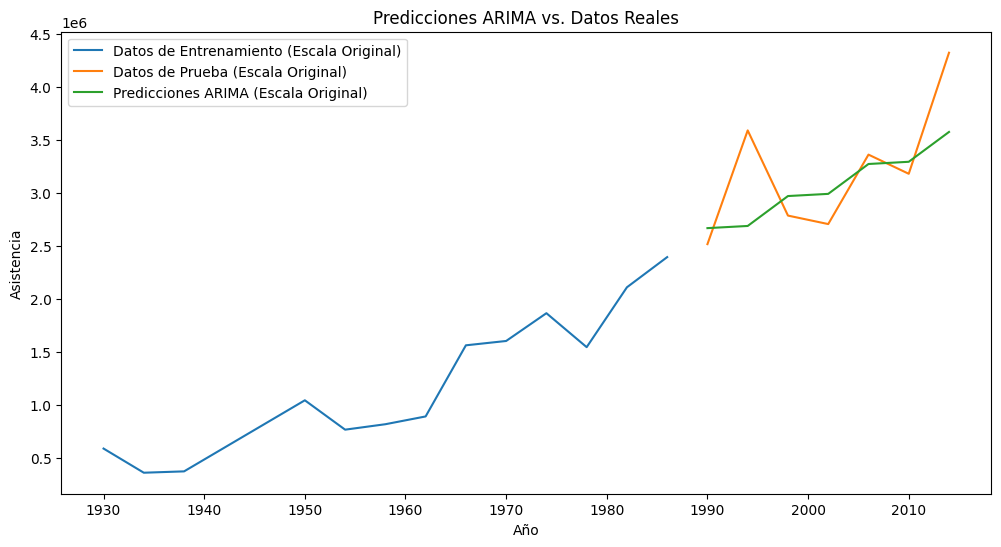


DataFrame comparativo de modelos:
             RMSE
ARIMA  466803.476


In [114]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que el índice sea DatetimeIndex para facilitar el manejo temporal
ts.index = pd.to_datetime(ts.index, format='%Y')

# Dividir los datos en conjuntos de entrenamiento y prueba (manteniendo el orden temporal)
train_data = ts[:-7]  # Usar los últimos 3 años como conjunto de prueba
test_data = ts[-7:]

# Entrenar el modelo ARIMA
# La elección de los órdenes (p, d, q) es crucial y a menudo requiere experimentación y análisis de ACF/PACF.
# Dado el pequeño conjunto de datos, comenzaremos con órdenes bajos.
try:
    model = ARIMA(train_data['Attendance'], order=(2, 2, 2))
    model_fit = model.fit()

    # Hacer predicciones en el conjunto de prueba
    predictions = model_fit.predict(start=len(train_data), end=len(ts) - 1)

    # Invertir la escala (ya que los datos se escalaron antes)
    predictions_original_scale = scaler.inverse_transform(predictions.values.reshape(-1, 1)).flatten()
    test_data_original_scale = scaler.inverse_transform(test_data['Attendance'].values.reshape(-1, 1)).flatten()
    train_data_original_scale = scaler.inverse_transform(train_data['Attendance'].values.reshape(-1, 1)).flatten()

    # Calcular el RMSE
    rmse = np.sqrt(mean_squared_error(test_data_original_scale, predictions_original_scale))
    print(f'RMSE del modelo ARIMA en el conjunto de prueba (escala original): {rmse:.3f}')

    # Calcular el MAE
    mae = mean_absolute_error(test_data_original_scale, predictions_original_scale)
    print(f'MAE del modelo ARIMA en el conjunto de prueba (escala original): {mae:.3f}')

    # Visualizar los resultados
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data_original_scale, label='Datos de Entrenamiento (Escala Original)')
    plt.plot(test_data.index, test_data_original_scale, label='Datos de Prueba (Escala Original)')
    plt.plot(test_data.index, predictions_original_scale, label='Predicciones ARIMA (Escala Original)')
    plt.title('Predicciones ARIMA vs. Datos Reales')
    plt.xlabel('Año')
    plt.ylabel('Asistencia')
    plt.legend()
    plt.show()

    # Agregar el resultado al DataFrame comparativo
    model_comparative = AddModel('ARIMA', rmse, model_comparative)
    print("\nDataFrame comparativo de modelos:")
    print(model_comparative)

except Exception as e:
    print(f"Ocurrió un error al ajustar el modelo ARIMA: {e}")
    print("Puede que necesites ajustar los órdenes (p, d, q) del modelo ARIMA.")

## ANN

In [115]:
WINDOW_SIZE = 5
X_train, y_train = prep_ts(train_set, WINDOW_SIZE)
X_test, y_test = prep_ts(test_set, WINDOW_SIZE)

In [116]:
X_train

array([[-0.97433918, -0.90933977, -0.31574627, -0.27956165],
       [-0.27956165, -0.04762389, -0.33111322,  0.16853582],
       [-1.3678248 , -0.77460078, -1.01970552, -0.97433918],
       [-0.04762389, -0.33111322,  0.16853582,  0.42043537],
       [-0.77460078, -1.01970552, -0.97433918, -0.90933977],
       [-1.01970552, -0.97433918, -0.90933977, -0.31574627],
       [-0.31574627, -0.27956165, -0.04762389, -0.33111322],
       [-1.17746658, -1.37907712, -1.3678248 , -0.77460078],
       [-1.37907712, -1.3678248 , -0.77460078, -1.01970552],
       [-0.90933977, -0.31574627, -0.27956165, -0.04762389]])

In [117]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [118]:
import keras
from keras import regularizers

ann_seq_1 = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=(1, WINDOW_SIZE-1)),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

ann_seq_1.compile(loss="mean_squared_error", optimizer="adam")
ann_seq_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3012
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1873
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.1236
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.1055
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1086
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1065
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0930
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.0768
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0679
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0674
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0657
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0574
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0470
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0412
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0406
Epoch 16/20
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
(10, 1, 1)
(2, 1, 1)
(10, 1)
(10, 1)
(2, 1)
(2, 1)
656724.6827741534
RMSE Mean: 656724.683


,RMSE
ARIMA,466803.476
ANN Sequential Model - 1 Capa,656724.683


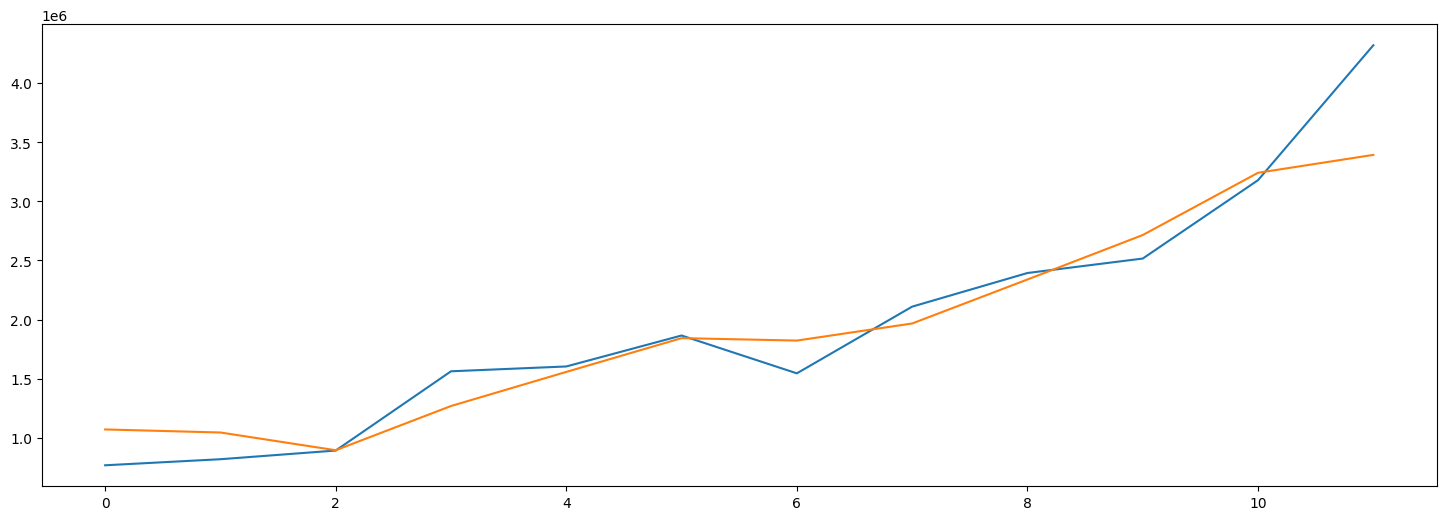

In [119]:

# Una vez está entrenado el modelo, vamos a preparar los inputs pero esta vez sin cambiar el orden,
# y obtenemos las predicciones de todo el set. Antes hacíamos shuffle para evitar el bias, ahora que ya
# está entrenado, podemos tener todo ordenado para que cuando lo visualicemos veamos la serie original.

X_train_seq1, y_train_seq1 = prep_ts(train_set, WINDOW_SIZE, shuffle=False)
X_test_seq1, y_test_seq1 = prep_ts(test_set, WINDOW_SIZE, shuffle=False)

X_train_seq1 = np.reshape(X_train_seq1, (X_train_seq1.shape[0], 1, X_train_seq1.shape[1]))
X_test_seq1 = np.reshape(X_test_seq1, (X_test_seq1.shape[0], 1, X_test_seq1.shape[1]))
# Obtenemos las predicciones del set.

pred_train = ann_seq_1.predict(X_train_seq1)
pred_test = ann_seq_1.predict(X_test_seq1)
print(pred_train.shape)
print(pred_test.shape)
# Volvemos a los valores iniciales, sin escalar, una vez hemos entrenado el modelo.

#pred_train = scaler.inverse_transform(pred_train)

# Redimensionamos a 2D
pred_train_2d = pred_train.reshape(-1, pred_train.shape[-1])
# Aplicamos inverse_transform
pred_train_rescaled = scaler.inverse_transform(pred_train_2d)
pred_train = pred_train_rescaled




#y_train_seq1 = scaler.inverse_transform([y_train_seq1])

# Si está en forma (samples, timesteps, 1) → aplánalo a 2D
y_train_seq1_2d = y_train_seq1.reshape(-1, y_train_seq1.shape[-1])
# Aplica inverse_transform
y_train_seq1_rescaled = scaler.inverse_transform(y_train_seq1_2d)
y_train_seq1 = y_train_seq1_rescaled






#pred_test = scaler.inverse_transform(pred_test)

pred_test_2d = pred_test.reshape(-1, pred_test.shape[-1])
# Aplicamos inverse_transform
pred_test_rescaled = scaler.inverse_transform(pred_test_2d)
pred_test = pred_test_rescaled






#y_test_seq1 = scaler.inverse_transform([y_test_seq1])

# Si está en forma (samples, timesteps, 1) → aplánalo a 2D
y_test_seq1_2d = y_test_seq1.reshape(-1, y_test_seq1.shape[-1])
# Aplica inverse_transform
y_test_seq1_rescaled = scaler.inverse_transform(y_test_seq1_2d)
y_test_seq1 = y_test_seq1_rescaled

print(y_train_seq1.shape)
print(pred_train.shape)
print(y_test_seq1.shape)
print(pred_test.shape)
ann_seq_1_rmse = np.sqrt(mean_squared_error(y_test_seq1, pred_test))

print(ann_seq_1_rmse)

# Concatenar directamente los arreglos 2D
y_show_train = y_train_seq1
y_show_test = y_test_seq1
# Concatenar ambos conjuntos de datos (manteniendo la forma 2D)
y_show = np.concatenate((y_show_train, y_show_test), axis=0)

# Concatenar directamente los arreglos 2D
y_show_pred_train = pred_train
y_show_pred_test = pred_test
# Concatenar ambos conjuntos de datos (manteniendo la forma 2D)
y_show_pred = np.concatenate((y_show_pred_train, y_show_pred_test), axis=0)
# Métricas
print("RMSE Mean:", np.round(ann_seq_1_rmse, 3))

# Visualizamos
figure(num=None, figsize=(18, 6))
plt.plot(y_show)
plt.plot(y_show_pred)

# Añadir a la tabla comparativa
model_comparative = AddModel('ANN Sequential Model - 1 Capa', ann_seq_1_rmse, model_comparative)
model_comparative.sort_values(by=['RMSE'], ascending=True).head()
